In [68]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

import matplotlib
from cycler import cycler

#Set up the matplotlib parameters here, same for all other plots
#Write a library/module in the future
tex_width = 483.41216#pt
tex_font = 8
tex_linewidth = 1

def plot_formatting(page_ratio, aspect_ratio=4/3):
    inches_per_pt = 1 / 72.27
    fig_width = page_ratio * tex_width * inches_per_pt
    fig_height = fig_width/aspect_ratio
    fontsize = tex_font / page_ratio
    linewidth = tex_linewidth / page_ratio
    figsize = (fig_width, fig_height)
    return figsize, linewidth

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.rcParams['axes.prop_cycle'] = cycler(color=custom_colors)
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='serif', size=tex_font)

## Online learning

In [24]:
results = np.load("../saves/online_hebb.npz")
m_in = results['m_in']
train_map1 = results['train_map1']
train_map2 = results['train_map2']
train_map1_err = results['train_map1_err']
train_map2_err = results['train_map2_err']
train_map1 = results['train_map1']
norm_true = results['norm_true']
norm_prev = results['norm_prev']
alpha = 0.1

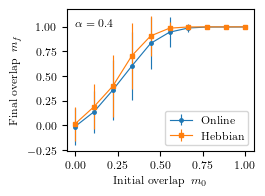

In [116]:
figsize, lw = plot_formatting(0.4)
fig, ax = plt.subplots(figsize=figsize)
ax.errorbar(m_in, train_map1, train_map1_err, fmt='o-',
            linewidth=lw/3, ms=lw,elinewidth=lw/3, label='Online')
ax.errorbar(m_in, train_map2, train_map2_err, fmt='s-',
            linewidth=lw/3, ms=lw, elinewidth=lw/3, label='Hebbian')
ax.set_xlabel(r'Initial overlap $\:m_{0}$')
ax.set_ylabel(r'Final overlap $\:m_{f}$')
ax.text(0, 1, rf'$\alpha = {alpha}$')
plt.tight_layout()
plt.legend()
plt.show()
fig.savefig('./plots/online_map.pdf', bbox_inches="tight")

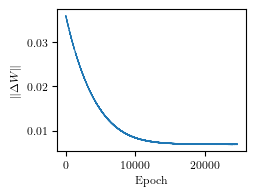

In [115]:
# HALF PAGE
figsize, lw = plot_formatting(0.4)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(norm_prev, lw=lw/3)
ax.set_xlabel('Epoch')
ax.set_ylabel(r'$\Vert\Delta W\Vert$')
plt.tight_layout()
plt.show()
fig.savefig('./plots/online_epoch.pdf', bbox_inches="tight")

## Sleep version 1

### Learning rate

In [8]:
results = np.load("../saves/convergence_time.npz")
results.files

['norm_tW', 'norm_W0', 'norm_dW', 'norm_dW0']

## Sleep version 2

### Comparison with v1

In [118]:
results = np.load('../saves/uncorr_stationary.npz')
alpha = results['alpha']
tau = results['tau']
m_in = results['m_in']
steps = results['steps']
map_v1 = results['results_v1']
map_v1_err = results['results_v1_err']
map_v2 = results['results']
map_v2_err = results['results_err']

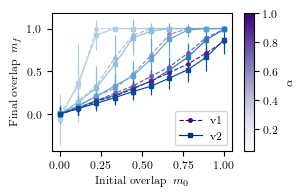

In [119]:
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize

cmp1 = matplotlib.colormaps['Purples']
cmp2 = matplotlib.colormaps['Blues']

def scale_alpha(a, min_val=0.3, max_val=0.9):
    return min_val + a * (max_val - min_val)

figsize, lw = plot_formatting(0.4)
fig, (ax, cbar_ax) = plt.subplots(1, 2, figsize=(figsize[0]*1.15, figsize[1]),
                                 gridspec_kw={'width_ratios': [20, 1]})# Plot data
for i, a in enumerate(alpha):
    scaled_a = scale_alpha(a)
    
    ax.errorbar(m_in, map_v1[i], map_v1_err[i], 
                fmt='o--',
                linewidth=lw/3, 
                ms=lw, 
                elinewidth=lw/3, 
                color=cmp1(scaled_a))
    
    ax.errorbar(m_in, map_v2[i], map_v2_err[i], 
                fmt='s-',
                linewidth=lw/3, 
                ms=lw,
                elinewidth=lw/3, 
                color=cmp2(scaled_a))

# Add marker style legend
ax.plot([], [], 'o--', 
                linewidth=lw/3, 
                ms=lw,
                color=cmp1(1.), label='v1')
ax.plot([], [], 's-', 
                linewidth=lw/3, 
                ms=lw,
                color=cmp2(1.), label='v2')
ax.legend()

norm = Normalize(vmin=min(alpha), vmax=max(alpha))
ColorbarBase(cbar_ax, cmap=cmp1, norm=norm, label=r'$\alpha$')

ax.set_xlabel(r'Initial overlap $\:m_{0}$')
ax.set_ylabel(r'Final overlap $\:m_{f}$')
plt.tight_layout()
plt.show()
fig.savefig('./plots/stationary_uncorr.pdf', bbox_inches="tight")

### Uncorrelated data

In [120]:
results = np.load('../saves/uncorr_results.npz')
results.files
m_in = results['m_in']
steps = results['steps']
tau = results['tau']
m_fin = results['results']

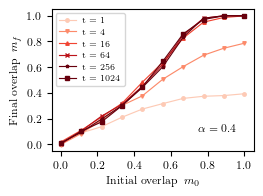

In [176]:
figsize, lw = plot_formatting(0.4)
alpha = 0.4
markers = ['o','v','^','x','*','s']
fig, ax = plt.subplots(figsize=figsize)# Plot data
cmap = matplotlib.colormaps['Reds']
def normalize(vec, off=.2):
    return (vec - vec.min()) / (vec.max() - vec.min())+off
colscale = normalize(np.log(steps))
for i, t in enumerate(steps):
    ax.plot(m_in, m_fin[i], color=cmap(colscale[i]), lw=lw/3, ms=lw, label=f't = {t}' , marker=markers[i])
plt.legend(prop={'size': 6})
ax.set_xlabel(r'Initial overlap $\:m_{0}$')
ax.set_ylabel(r'Final overlap $\:m_{f}$')
ax.text(.75, 0.1, fr'$\alpha = {alpha}$')
plt.tight_layout()
plt.show()
fig.savefig('./plots/evol_uncorr.pdf', bbox_inches="tight")

### Correlated data

#### Feature retrieval

In [209]:
file = np.load('../saves/corr_hebb.npz')
file.files
m_in = file['m_in']
tau = file['tau']
alpha = file['alpha']
alpha_D = file['alpha_D']
results = file['results']
results_hebb = file['results_hebb']

data = np.load("../saves/corr_storage.npz")
alpha2 = data["alpha"]
corr_hebb = data["corr_hebb"]
corr_sleep = data["corr_sleep"]

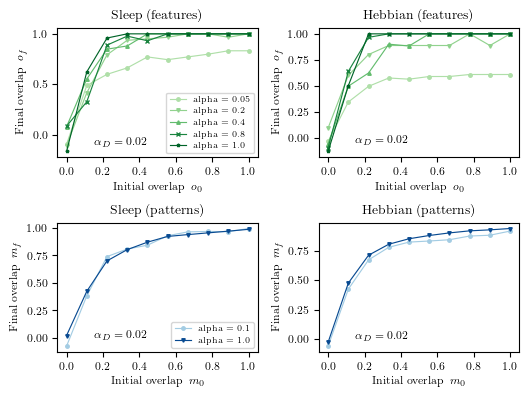

In [210]:
figsize, lw = plot_formatting(0.4)
markers = ['o','v','^','x','*','s']
fig, ax = plt.subplots(2, 2, figsize=(2*figsize[0], 2*figsize[1]))# Plot data
cmap1 = matplotlib.colormaps['Greens']
cmap2 = matplotlib.colormaps['Blues']
for i, a in enumerate(alpha):
  ax[0,0].plot(m_in, results[i], markers[i]+'-', lw=lw/3, ms=lw,
             color=cmap1(scale_alpha(a)), label=f'alpha = {a}')
  ax[0,1].plot(m_in, results_hebb[i], markers[i]+'-', lw=lw/3, ms=lw,
             color=cmap1(scale_alpha(a)), label=f'alpha = {a}')
ax[0,0].set_xlabel(r'Initial overlap $\:o_{0}$')
ax[0,0].set_ylabel(r'Final overlap $\:o_{f}$')
ax[0,1].set_xlabel(r'Initial overlap $\:o_{0}$')
ax[0,1].set_ylabel(r'Final overlap $\:o_{f}$')
ax[0,0].legend(prop={'size': 6})
ax[0,0].text(0.15, -0.1, rf'$\alpha_D = {alpha_D}$')
ax[0,1].text(0.15, -0.05, rf'$\alpha_D = {alpha_D}$')
ax[0,0].set_title('Sleep (features)')
ax[0,1].set_title('Hebbian (features)')

for i, a in enumerate(alpha2):
  ax[1,0].plot(m_in, corr_sleep[i], markers[i]+'-', lw=lw/3, ms=lw,
             color=cmap2(scale_alpha(a)), label=f'alpha = {a}')
  ax[1,1].plot(m_in, corr_hebb[i], markers[i]+'-', lw=lw/3, ms=lw,
             color=cmap2(scale_alpha(a)), label=f'alpha = {a}')
ax[1,0].set_xlabel(r'Initial overlap $\:m_{0}$')
ax[1,0].set_ylabel(r'Final overlap $\:m_{f}$')
ax[1,1].set_xlabel(r'Initial overlap $\:m_{0}$')
ax[1,1].set_ylabel(r'Final overlap $\:m_{f}$')
ax[1,0].legend(prop={'size': 6})
ax[1,0].text(0.15, 0, rf'$\alpha_D = {alpha_D}$')
ax[1,1].text(0.15, 0, rf'$\alpha_D = {alpha_D}$')
ax[1,0].set_title('Sleep (patterns)')
ax[1,1].set_title('Hebbian (patterns)')

plt.tight_layout()
plt.savefig('./plots/corr_data.pdf', bbox_inches="tight")
plt.show()

### Spurious patterns

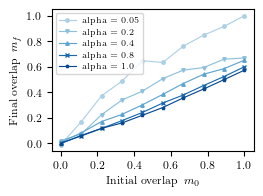

In [212]:
data = np.load("../saves/spurious_uncorr.npz")
m_in = data["m_in"]
tau = data["tau"]
alpha = data["alpha"]
spur_uncorr = data["results"]
fig, ax = plt.subplots(figsize=figsize)
cmap = matplotlib.colormaps['Blues']
for i, a in enumerate(alpha):
    ax.plot(m_in, spur_uncorr[i], markers[i]+'-', lw=lw/3, ms=lw,
                 color=cmap2(scale_alpha(a)), label=f'alpha = {a}')
ax.legend(prop={'size': 6})
ax.set_xlabel(r'Initial overlap $\:m_{0}$')
ax.set_ylabel(r'Final overlap $\:m_{f}$')
plt.tight_layout()
plt.savefig('./plots/spur_data.pdf', bbox_inches="tight")
plt.show()